# Exercise 08 (Module 10)
Hao-Tien Kuo

## Logistic Regression

In [21]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('framingham_dataset_mod.xlsx')

Answer the following:
- What is the outcome?
    - chdfate: whether the patient developed CHD 
- What are the predictors researchers are interested in?
    - Patient gender, Systolic blood pressure, Diastolic blood pressure, Serum cholesterol, Age, BMI, Month of year of baseline exam
- What is the hypothesis?
    - H0: None of the predictors is related to the outcome
    - H1: At least one of the predictor is related to the outcome

In [22]:
# Import the data, print out a few rows, and compute summary statistics. 
# Is there missing data or other concerns?

df.head()

,id,sex,sbp,dbp,scl,age,bmi,month,chdfate
0,2642,1,120,80,267.0,55,25.0,8,1
1,4627,1,130,78,192.0,53,28.4,12,1
2,2568,1,144,90,207.0,61,25.1,8,1
3,4192,1,92,66,231.0,48,26.2,11,1
4,3977,1,162,98,271.0,39,28.4,11,1


In [23]:
df.info()

# Missing data in scl and bmi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       4695 non-null   int64  
 1   sex      4695 non-null   int64  
 2   sbp      4695 non-null   int64  
 3   dbp      4695 non-null   int64  
 4   scl      4662 non-null   float64
 5   age      4695 non-null   int64  
 6   bmi      4686 non-null   float64
 7   month    4695 non-null   int64  
 8   chdfate  4695 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 330.2 KB


In [24]:
df.describe()

,id,sex,sbp,dbp,scl,age,bmi,month,chdfate
count,4695.000000,4695.000000,4695.000000,4695.000000,4662.000000,4695.000000,4686.000000,4695.000000,4695.000000
mean,2350.365282,1.563791,132.776358,82.547391,228.282711,46.037487,25.630837,6.370394,0.313312
std,1356.328620,0.495967,22.802159,12.739928,44.559330,8.505511,4.095526,3.683150,0.463889
min,1.000000,1.000000,80.000000,40.000000,115.000000,30.000000,16.200000,1.000000,0.000000
25%,1175.500000,1.000000,116.000000,74.000000,197.000000,39.000000,22.800000,3.000000,0.000000
50%,2351.000000,2.000000,130.000000,80.000000,225.000000,45.000000,25.200000,6.000000,0.000000
75%,3524.500000,2.000000,144.000000,90.000000,255.000000,53.000000,28.000000,10.000000,1.000000
max,4699.000000,2.000000,270.000000,148.000000,568.000000,68.000000,57.600000,12.000000,1.000000


In [25]:
df.fillna(value={'scl': df['scl'].median(), 'bmi': df['bmi'].median()}, inplace=True)

# Fill missing values with column median.

In [26]:
# Month of the year at baseline is an unwieldy variable meant to adjust for seasonal effects.
# Rather than put it in the model as is, create 4 binary variables for each season.

df['winter'] = np.where((df['month'] == 12) | (df['month'] < 3), 1, 0)
df['spring'] = np.where((df['month'] >= 3) & (df['month'] < 6), 1, 0)
df['summer'] = np.where((df['month'] >= 6) & (df['month'] < 9), 1, 0)
df['fall'] = np.where((df['month'] >= 9) & (df['month'] < 12), 1, 0)

df.head()

,id,sex,sbp,dbp,scl,age,bmi,month,chdfate,winter,spring,summer,fall
0,2642,1,120,80,267.0,55,25.0,8,1,0,0,1,0
1,4627,1,130,78,192.0,53,28.4,12,1,1,0,0,0
2,2568,1,144,90,207.0,61,25.1,8,1,0,0,1,0
3,4192,1,92,66,231.0,48,26.2,11,1,0,0,0,1
4,3977,1,162,98,271.0,39,28.4,11,1,0,0,0,1


In [27]:
# Fit a logistic regression model using all the relevant predictor variables.
# Use statsmodels for now.

import statsmodels.api as sm

X = df.drop(columns=['id', 'month', 'chdfate'])
y = df['chdfate']

logit = sm.Logit(y, X).fit()

print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.573342
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                chdfate   No. Observations:                 4695
Model:                          Logit   Df Residuals:                     4685
Method:                           MLE   Df Model:                            9
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                 0.07782
Time:                        22:05:46   Log-Likelihood:                -2691.8
converged:                       True   LL-Null:                       -2919.0
Covariance Type:            nonrobust   LLR p-value:                 3.423e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -0.8033      0.068    -11.885      0.000      -0.936      -0.671
sbp            0.0079      0.

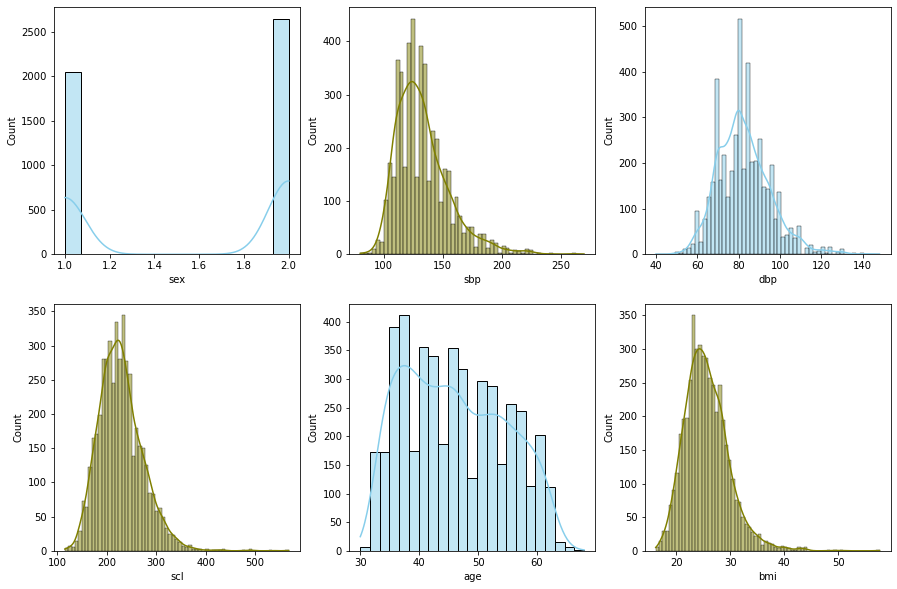

In [28]:
# Conduct model diagnostics.
# Look at distributions of the main predictor variables (excluding the new season variables). Do any require transformation?

fig, axs = plt.subplots(2, 3, figsize = (15, 10))

sns.histplot(data = df['sex'], kde = True, ax = axs[0,0], color = 'skyblue')
sns.histplot(data = df['sbp'], kde = True, ax = axs[0,1], color = 'olive')
sns.histplot(data = df['dbp'], kde = True, ax = axs[0,2], color = 'skyblue')
sns.histplot(data = df['scl'], kde = True, ax = axs[1,0], color = 'olive')
sns.histplot(data = df['age'], kde = True, ax = axs[1,1], color = 'skyblue')
sns.histplot(data = df['bmi'], kde = True, ax = axs[1,2], color = 'olive')

plt.show()

# The distributions of sbp, scl, age, and bmi seem skewed, and would require transformation.

In [29]:
# Check to see if collinearity is present. Explain what you find.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

# All the variables, except for the four season variables, have VIF under the threshold of 5. 

,Variables,VIF
0,sex,1.024007
1,sbp,2.971142
2,dbp,2.781810
3,scl,1.110608
4,age,1.267231
5,bmi,1.178126
6,winter,28.608747
7,spring,25.003071
8,summer,15.464937
9,fall,28.307535


In [30]:
# Check linearity for each of the continuous covariates. 
# Do those covariates each have a linear relationship with the outcome?

# Box-Tidwell Test

# Define continuous variables
continuous_var = ['sbp', 'dbp', 'scl', 'age', 'bmi']

# Add logit transform interaction terms (natural log) for continuous variables e.g.. Age * Log(Age)
for var in continuous_var:
    df[f'{var}:Log_{var}'] = df[var].apply(lambda x: x * np.log(x))

# Keep columns related to continuous variables
cols_to_keep = continuous_var + df.columns.tolist()[-len(continuous_var):]

# Redefining variables to include interaction terms
X_lt = df[cols_to_keep]

# Add constant term
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Building model and fit the data (using statsmodel's Logit)
logit_results = sm.GLM(y, X_lt_constant, family=sm.families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

# The interaction terms sbp:Log_sbp, dbp:Log_dbp, scl:Log_scl, age:Log_age all have p-value above 0.05, 
# implying that the independent variables (sbp, dbp, scl, age) are linearly related to the logit of the outcome variable and that the assumption is satisfied.

# On the contrary, bmi:Log_bmi is statistically significant (i.e., p≤0.05), indicating the presence of non-linearity between bmi and the logit.
# One solution is to perform transformations by incorporating higher-order polynomial terms to capture the non-linearity.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                chdfate   No. Observations:                 4695
Model:                            GLM   Df Residuals:                     4684
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.2
Date:                Sun, 20 Nov 2022   Deviance:                       5512.4
Time:                        22:05:56   Pearson chi2:                 4.66e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06699
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
sbp             0.0539      0.084      0.643      

In [31]:
# Are there outliers?

from scipy import stats

# Use GLM method for logreg here so that we can retrieve the influence measures
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Get influence measures
influence = logit_results.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df.loc[(diagnosis_df['cooks_d'] > cook_threshold) & (diagnosis_df['std_resid'] > 3),]

# Show highly influential outlier observations
extreme.sort_values('cooks_d', ascending=False)

# Yes, we found 8 most influential outliers.

<ipython-input-31-990959d1b4ba>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-31-990959d1b4ba>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


,cooks_d,std_resid
1465,0.001298,3.232755
1041,0.001237,3.198401
1931,0.001212,3.349938
1258,0.001176,3.244243
809,0.001101,3.316340
3126,0.001080,3.169108
847,0.000890,3.064660
1734,0.000864,3.080763


In [32]:
# Are there at least 5 outcomes per category of sex?

pd.crosstab(df['sex'], df['chdfate'], margins = True)

# Yes, each sex has sufficient outcomes.

chdfate,0,1,All
sex,,,
1,1226,822,2048
2,1998,649,2647
All,3224,1471,4695


In [33]:
# Fix any issues you find and refit the model.

# Transform skewed distributions
df['sbp']=np.log(df['sbp'])
df['scl']=np.log(df['scl'])
df['age']=np.log(df['age'])
df['bmi']=np.log(df['bmi'])

# Incorporate higher-order polynomial terms to capture the non-linearity
df['bmi_squared']=np.power(df['bmi'], 2)

# Drop influential outliers
df.drop([1465, 1041, 1931, 1258, 809, 3126, 847, 1734], inplace = True)

# Drop one of the season variables to reduce collinearity
X = df[['sex', 'sbp', 'dbp', 'scl', 'age', 'bmi', 'bmi_squared', 'spring', 'summer', 'fall']]

y = df['chdfate']

logit_fixed = sm.Logit(y, X).fit()

print(logit_fixed.summary())

Optimization terminated successfully.
         Current function value: 0.570662
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                chdfate   No. Observations:                 4687
Model:                          Logit   Df Residuals:                     4677
Method:                           MLE   Df Model:                            9
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                 0.08077
Time:                        22:06:14   Log-Likelihood:                -2674.7
converged:                       True   LL-Null:                       -2909.7
Covariance Type:            nonrobust   LLR p-value:                 1.504e-95
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
sex            -0.8333      0.068    -12.259      0.000      -0.967      -0.700
sbp             1.0632    

In [36]:
# Compute the ORs and their confidence intervals. Interpret the ORs.

odds_ratio = pd.DataFrame(np.exp(logit_fixed.params), columns= ['OR'])
odds_ratio['z-value']= logit_fixed.pvalues
odds_ratio[['2.5%', '97.5%']] = np.exp(logit_fixed.conf_int())

odds_ratio

# For continuous predictors (sbp, dbp, scl, age, bmi), OR represents how many times the subjects are more likely to experience the outcome in each unit increase.
# For categorical predictors (sex, season), OR represents how many times the subjects are more likely to experience the outcome than the base line.

# OR=1 Explanatory variable not related to odds of outcome: dbp, season
# OR>1 Explanatory variable associated with higher odds of outcome: sbp, scl, age, bmi_squared
# OR<1 Explanatory variable associated with lower odds of outcome: sex, bmi

,OR,z-value,2.5%,97.5%
sex,0.434606,1.501065e-34,3.803958e-01,0.496543
sbp,2.895710,2.185527e-03,1.466769e+00,5.716741
dbp,1.006765,1.103724e-01,9.984664e-01,1.015132
scl,5.108208,4.266794e-18,3.533313e+00,7.385079
age,2.449285,7.289596e-06,1.655882e+00,3.622840
bmi,0.000006,1.127072e-34,8.831430e-07,0.000041
bmi_squared,7.627727,1.953288e-38,5.610375e+00,10.370469
spring,1.104064,2.656512e-01,9.274520e-01,1.314309
summer,0.967027,7.496418e-01,7.870494e-01,1.188160
fall,0.973839,7.599359e-01,8.215605e-01,1.154342
